In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cauchy_simulations import CauchyLiquidityProfile, VariableCauchyLiquidityProfile, from_bps_tick

In [99]:
C = 10.0  # total liquidity parameter
GAMMA = 0.1  # scale parameter
MAX_TICK = 887272
TICK_SPACING = 10  # step size between ticks in arrays

In [100]:
clp = CauchyLiquidityProfile(c=C, gamma=GAMMA)
vlp = VariableCauchyLiquidityProfile(c=C, gamma=GAMMA)

In [101]:
# change clp normalization constant to match vlp
n_cauchy = clp.at(0) / clp.c
clp.c = clp.c / n_cauchy

In [102]:
# should be C
clp.at(0) == vlp.at(0)

True

In [103]:
bps_ticks = np.arange(start=-MAX_TICK, stop=MAX_TICK, step=TICK_SPACING)

In [104]:
df = pd.DataFrame(data={'bps_ticks': bps_ticks, 'log_ticks': from_bps_tick(bps_ticks)})

In [105]:
# plot liquidity profile over ticks
df[f'cl(t) [g={GAMMA}]'] = clp.at(df['log_ticks'])
df[f'vl(t) [g={GAMMA}]'] = vlp.at(df['log_ticks'])

In [106]:
df

,bps_ticks,log_ticks,cl(t) [g=0.1],vl(t) [g=0.1]
0,-887272,-88.722764,0.000013,5.000003
1,-887262,-88.721764,0.000013,5.000003
2,-887252,-88.720764,0.000013,5.000003
3,-887242,-88.719764,0.000013,5.000003
4,-887232,-88.718764,0.000013,5.000003
...,...,...,...,...
177450,887228,88.718364,0.000013,5.000003
177451,887238,88.719364,0.000013,5.000003
177452,887248,88.720364,0.000013,5.000003
177453,887258,88.721364,0.000013,5.000003


<Axes: xlabel='bps_ticks'>

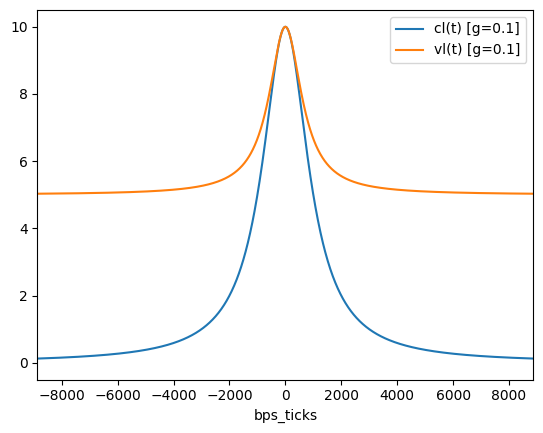

In [107]:
df.plot(x='bps_ticks', y=[f'cl(t) [g={GAMMA}]', f'vl(t) [g={GAMMA}]'], xlim=(-MAX_TICK // 100, MAX_TICK // 100))

In [108]:
gammas = [0.0125, 0.025, 0.05, 0.075, 0.1]

In [109]:
# look at slippage curves for different gamma values
for g in gammas:
    df[f'vl(t) [g={g}]'] = VariableCauchyLiquidityProfile(c=vlp.c, gamma=g).at(df['log_ticks'])
    df[f'vdt/dy [g={g}]'] = VariableCauchyLiquidityProfile(c=vlp.c, gamma=g).slip_y(df['log_ticks'])
    df[f'vdt/dx [g={g}]'] = VariableCauchyLiquidityProfile(c=vlp.c, gamma=g).slip_x(df['log_ticks'])

In [110]:
df

,bps_ticks,log_ticks,cl(t) [g=0.1],vl(t) [g=0.1],vl(t) [g=0.0125],vdt/dy [g=0.0125],vdt/dx [g=0.0125],vl(t) [g=0.025],vdt/dy [g=0.025],vdt/dx [g=0.025],vl(t) [g=0.05],vdt/dy [g=0.05],vdt/dx [g=0.05],vl(t) [g=0.075],vdt/dy [g=0.075],vdt/dx [g=0.075],vdt/dy [g=0.1],vdt/dx [g=0.1]
0,-887272,-88.722764,0.000013,5.000003,5.0,7.378420e+18,-2.168486e-20,5.0,7.378420e+18,-2.168486e-20,5.000001,7.378419e+18,-2.168486e-20,5.000002,7.378418e+18,-2.168485e-20,7.378416e+18,-2.168484e-20
1,-887262,-88.721764,0.000013,5.000003,5.0,7.374732e+18,-2.169570e-20,5.0,7.374732e+18,-2.169570e-20,5.000001,7.374731e+18,-2.169570e-20,5.000002,7.374730e+18,-2.169570e-20,7.374727e+18,-2.169569e-20
2,-887252,-88.720764,0.000013,5.000003,5.0,7.371046e+18,-2.170655e-20,5.0,7.371046e+18,-2.170655e-20,5.000001,7.371045e+18,-2.170655e-20,5.000002,7.371043e+18,-2.170655e-20,7.371041e+18,-2.170654e-20
3,-887242,-88.719764,0.000013,5.000003,5.0,7.367361e+18,-2.171741e-20,5.0,7.367361e+18,-2.171741e-20,5.000001,7.367360e+18,-2.171741e-20,5.000002,7.367359e+18,-2.171740e-20,7.367357e+18,-2.171739e-20
4,-887232,-88.718764,0.000013,5.000003,5.0,7.363679e+18,-2.172827e-20,5.0,7.363679e+18,-2.172827e-20,5.000001,7.363678e+18,-2.172827e-20,5.000002,7.363676e+18,-2.172826e-20,7.363674e+18,-2.172826e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177450,887228,88.718364,0.000013,5.000003,5.0,2.173262e-20,-7.362206e+18,5.0,2.173261e-20,-7.362206e+18,5.000001,2.173261e-20,-7.362205e+18,5.000002,2.173261e-20,-7.362204e+18,2.173260e-20,-7.362202e+18
177451,887238,88.719364,0.000013,5.000003,5.0,2.172175e-20,-7.365888e+18,5.0,2.172175e-20,-7.365888e+18,5.000001,2.172175e-20,-7.365887e+18,5.000002,2.172174e-20,-7.365886e+18,2.172174e-20,-7.365884e+18
177452,887248,88.720364,0.000013,5.000003,5.0,2.171089e-20,-7.369572e+18,5.0,2.171089e-20,-7.369572e+18,5.000001,2.171089e-20,-7.369571e+18,5.000002,2.171089e-20,-7.369569e+18,2.171088e-20,-7.369567e+18
177453,887258,88.721364,0.000013,5.000003,5.0,2.170004e-20,-7.373257e+18,5.0,2.170004e-20,-7.373257e+18,5.000001,2.170004e-20,-7.373256e+18,5.000002,2.170003e-20,-7.373255e+18,2.170003e-20,-7.373253e+18


<Axes: xlabel='bps_ticks'>

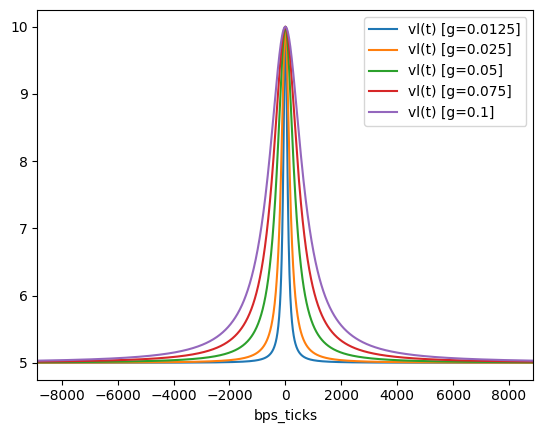

In [111]:
# gamma is leverage parameter reducing liquidity density to delta function as g -> 0 (equiv to constant sum at tick=0)
df.plot(x='bps_ticks', y=[f'vl(t) [g={g}]' for g in gammas], xlim=(-MAX_TICK // 100, MAX_TICK // 100))

<Axes: xlabel='bps_ticks'>

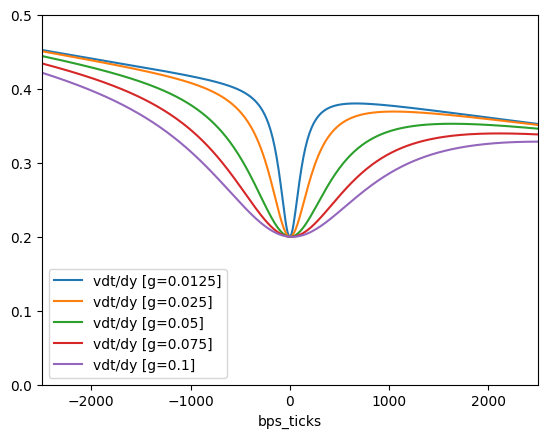

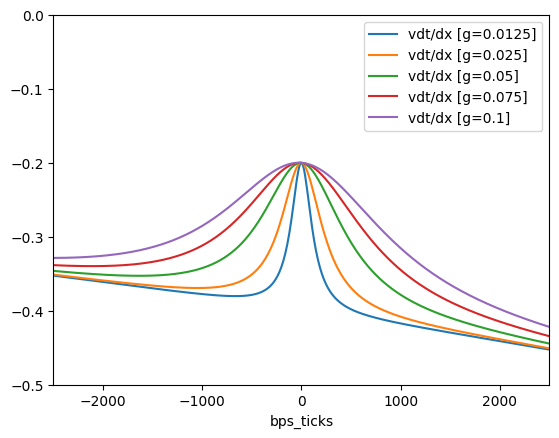

In [121]:
# plot y and x slippage across near tick=0 to +/-25% for multiple gammas
# far less extreme drop off than base 
df.plot(x='bps_ticks', y=[f'vdt/dy [g={g}]' for g in gammas], xlim=(-2500, 2500), ylim=(0, 0.5))
df.plot(x='bps_ticks', y=[f'vdt/dx [g={g}]' for g in gammas], xlim=(-2500, 2500), ylim=(-0.5, -0))

In [122]:
top = 20000  # bps
width = TICK_SPACING

In [127]:
bps_ticks_in_ranges = np.array([width * i for i in range((top + width) // width)])
df_w_ranges = pd.DataFrame(data={
    'bps_ticks': bps_ticks_in_ranges,
    'log_ticks': from_bps_tick(bps_ticks_in_ranges),
    'price': np.exp(from_bps_tick(bps_ticks_in_ranges)),
    'price^{-1}': np.exp(-from_bps_tick(bps_ticks_in_ranges))
})

In [128]:
df_w_ranges

,bps_ticks,log_ticks,price,price^{-1}
0,0,0.0000,1.000000,1.000000
1,10,0.0010,1.001000,0.999001
2,20,0.0020,1.002002,0.998002
3,30,0.0030,1.003004,0.997005
4,40,0.0040,1.004008,0.996008
...,...,...,...,...
1996,19960,1.9959,7.358825,0.135891
1997,19970,1.9969,7.366187,0.135755
1998,19980,1.9979,7.373556,0.135620
1999,19990,1.9989,7.380933,0.135484


In [133]:
# calculate relevant curve slippage quantities for different gamma values
for g in gammas:
    print(f"Calculating in/out slippage quantities for gamma: {g} ...", end='\r')

    # xout, yin and initial reserves
    df_w_ranges[f'xout [g={g}]'] = df_w_ranges['bps_ticks'].apply(lambda t: VariableCauchyLiquidityProfile(c=C, gamma=g).cost_x(from_bps_tick(0), from_bps_tick(t)))
    df_w_ranges[f'yin [g={g}]'] = df_w_ranges['bps_ticks'].apply(lambda t: VariableCauchyLiquidityProfile(c=C, gamma=g).cost_y(from_bps_tick(0), from_bps_tick(t)))
    df_w_ranges[f'rx0 [g={g}]'] = df_w_ranges['bps_ticks'].apply(lambda t: VariableCauchyLiquidityProfile(c=C, gamma=g).reserves_x(from_bps_tick(0), from_bps_tick(MAX_TICK)))
    df_w_ranges[f'ry0 [g={g}]'] = df_w_ranges['bps_ticks'].apply(lambda t: VariableCauchyLiquidityProfile(c=C, gamma=g).reserves_y(from_bps_tick(0), from_bps_tick(MAX_TICK)))

    # ratios for plotting
    df_w_ranges[f'xout/rx0 [g={g}]'] = df_w_ranges[f'xout [g={g}]'] / df_w_ranges[f'rx0 [g={g}]']
    df_w_ranges[f'|xout|/rx0 [g={g}]'] = np.abs(df_w_ranges[f'xout [g={g}]']) / df_w_ranges[f'rx0 [g={g}]']
    df_w_ranges[f'yin/ry0 [g={g}]'] = df_w_ranges[f'yin [g={g}]'] / df_w_ranges[f'ry0 [g={g}]']

Calculating in/out slippage quantities for gamma: 0.1 ......

In [134]:
df_w_ranges

,bps_ticks,log_ticks,price,price^{-1},xout [g=0.0125],yin [g=0.0125],rx0 [g=0.0125],ry0 [g=0.0125],"xout/rx0 [c=10.0, g=0.0125]","|xout|/rx0 [c=10.0, g=0.0125]",...,yin/ry0 [g=0.025],xout/rx0 [g=0.05],|xout|/rx0 [g=0.05],yin/ry0 [g=0.05],xout/rx0 [g=0.075],|xout|/rx0 [g=0.075],yin/ry0 [g=0.075],xout/rx0 [g=0.1],|xout|/rx0 [g=0.1],yin/ry0 [g=0.1]
0,0,0.0000,1.000000,1.000000,-0.000000,0.000000,5.034139,5.034139,-0.000000,0.000000,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
1,10,0.0010,1.001000,0.999001,-0.004988,0.004990,5.034139,5.034139,-0.000991,0.000991,...,0.000986,-0.000974,0.000974,0.000974,-0.000962,0.000962,0.000963,-0.000951,0.000951,0.000952
2,20,0.0020,1.002002,0.998002,-0.009912,0.009922,5.034139,5.034139,-0.001969,0.001969,...,0.001970,-0.001947,0.001947,0.001948,-0.001924,0.001924,0.001926,-0.001902,0.001902,0.001904
3,30,0.0030,1.003004,0.997005,-0.014719,0.014741,5.034139,5.034139,-0.002924,0.002924,...,0.002948,-0.002917,0.002917,0.002921,-0.002884,0.002884,0.002888,-0.002852,0.002852,0.002856
4,40,0.0040,1.004008,0.996008,-0.019371,0.019409,5.034139,5.034139,-0.003848,0.003848,...,0.003918,-0.003885,0.003885,0.003893,-0.003843,0.003843,0.003851,-0.003801,0.003801,0.003808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,19960,1.9959,7.358825,0.135891,-3.190953,8.598776,5.034139,5.034139,-0.633863,0.633863,...,1.703965,-0.640792,0.640792,1.696866,-0.645029,0.645029,1.691028,-0.649008,0.649008,1.686234
1997,19970,1.9969,7.366187,0.135755,-3.191874,8.605559,5.034139,5.034139,-0.634046,0.634046,...,1.705304,-0.640971,0.640971,1.698188,-0.645207,0.645207,1.692335,-0.649184,0.649184,1.687527
1998,19980,1.9979,7.373556,0.135620,-3.192795,8.612346,5.034139,5.034139,-0.634229,0.634229,...,1.706643,-0.641151,0.641151,1.699511,-0.645384,0.645384,1.693642,-0.649359,0.649359,1.688820
1999,19990,1.9989,7.380933,0.135484,-3.193715,8.619136,5.034139,5.034139,-0.634411,0.634411,...,1.707983,-0.641330,0.641330,1.700835,-0.645562,0.645562,1.694951,-0.649535,0.649535,1.690114


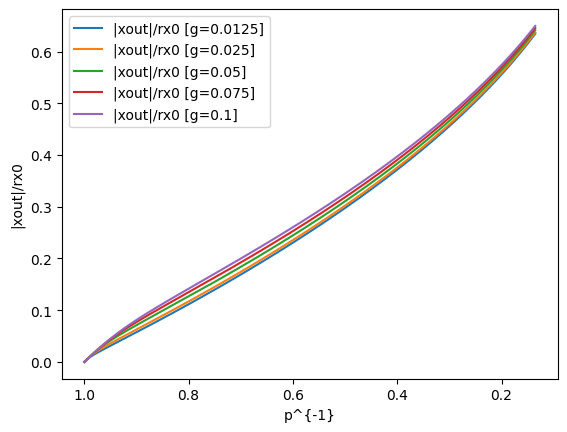

In [135]:
# plot inverse price vs x out as fraction of initial reserves for different gammas
ax = df_w_ranges.plot(x='price^{-1}', y=[f'|xout|/rx0 [g={g}]' for g in gammas], xlabel='p^{-1}', ylabel=f'|xout|/rx0', label=[f'|xout|/rx0 [g={g}]' for g in gammas])
ax.invert_xaxis()

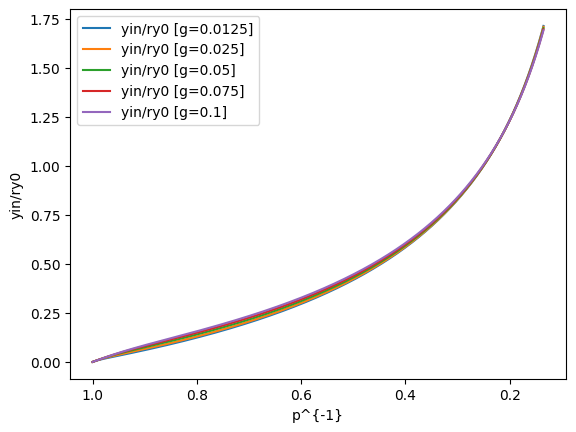

In [137]:
# for modified, plot inverse price vs y in as fraction of initial reserves for different gammas
# not good for stable pairs
ax = df_w_ranges.plot(x='price^{-1}', y=[f'yin/ry0 [g={g}]' for g in gammas], xlabel='p^{-1}', ylabel=f'yin/ry0', label=[f'yin/ry0 [g={g}]' for g in gammas])
ax.invert_xaxis()